# Working with Color Images

"One application of 3D arrays is with color images. A RGB image has a width and height, but also three color channels: The amount of red, green, and blue in a pixel. As such, a 200x300 RGB image can be modeled as a 3D array with shape $(200, 300, 3)$ where the last axis records to colors red, greed, and blue.
    
    "In this exercise set we will work with color images to get some experience with 3D arrays. The cell below to import the necessary libraries."

In [1]:
# RUN THE CELL AND DON'T MODIFY IT
import numpy as np # Imports NumPy
from skimage import data # Getting the image
import matplotlib.pyplot as plt # Showing the image

# We will use the submodule <b>data</b> of the <b>skimage</b> package to import the premade image <b>astronaut</b> depicting Eileen Collins:"

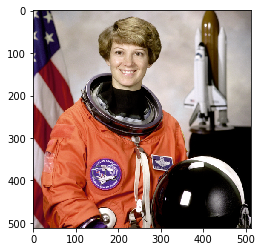

In [2]:
astronaut = data.astronaut()
plt.imshow(astronaut)

# Exercise 1:  Checking the Shape
Verify that the image is indeed a NumPy array. Check out the shape of the image.

In [3]:
print("The image is of type: ", type(astronaut))

The image is of type:  <class 'numpy.ndarray'>


In [4]:
print("The shape of the image is:", astronaut.shape)

The shape of the image is: (512, 512, 3)


    "Notice that the image has three color channels, represented in the last axis since the shape is $$(512, 512, 3).$$"


# Exercise 2: Showing the Different Colors

    "The following code cell illustrates how to show only the red in the image."


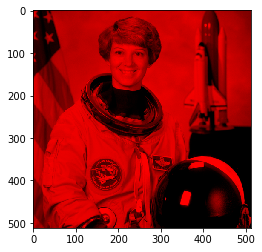

In [5]:
red_image = astronaut.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0
plt.imshow(red_image)

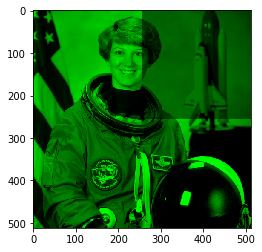

In [16]:
# Pick out all the green in the image (make sure to make a copy of the astronaut image)
green_image = astronaut.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0
plt.imshow(green_image)

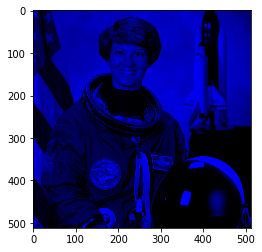

In [6]:
# Pick out all the blue in the image (make sure to make a copy of the astronaut image).
blue_image = astronaut.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0
plt.imshow(blue_image)

# Exercise 3: Color Alteration by Decreasing a Color
To play around with the image, let us try to decrease the blue levels in the image. Remove half of the blue color in the image (multiply the blue levels with $0.5$)"

In [7]:
# Make a copy of the astronaut image called less_blue 
less_blue = astronaut.copy()



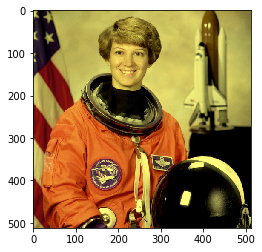

In [8]:
# Remove half of the blue color and show the result
less_blue[:, :, 2] = less_blue[:, :, 2] * 0.5
plt.imshow(less_blue)

# Exercise 4: Color Alteration by Increasing a Color
    "One needs to be slightly more careful when increasing a color since one can then get a higher value that 255. The data type of our astronaut image is <i>uint8</i>. This means that if we have a value of 154 in our array and multiply that with 2, then we get a value of $$154 * 2 - 256 = 308 - 256 = 52$$ because $256$ is identified with $0$.\n",
    "\n",
    "Hence we need to be more careful and ensure that the values do not exceed 255. Say we want to add $10$ to the amount of red in each pixel. Then the values between 246 and 255 will now have values between 0 and 9 (which is called <i>overflowing</i>). This makes little sense, since the most \"red\" pixels will have almost no red in them afterwards. So after the adding of $10$ we manually have to set the pixels with red less than 10 to 255 again after the transformation so that they have a maximum of red in them. The following cells walks you through this."

In [10]:
# Make a copy of the astronaut image called red_more
red_more = astronaut.copy()

# Add 10 levels of red to each pixel in the image
red_more[:, :, 0] = red_more[:, :, 0] + 10
    


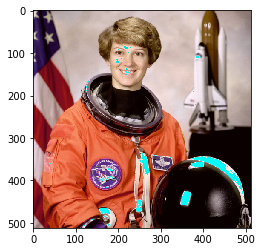

In [11]:
# Show the image (the image is wrong due to overflowing)
plt.imshow(red_more)

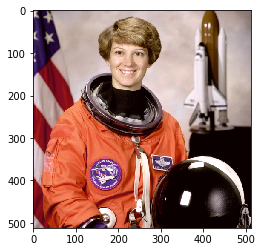

In [12]:
# Set the red values in red_block lower than 10 to be 255
red_block = red_more[:, :, 0]
red_block[red_block < 10] = 255

# Explanation: red_block is a view of red_more, so changes to red_block will also change red_more.  
#Show the image again
plt.imshow(red_more)

# Exercise 5: Divide and Conquer
"Let us use slicing to divide the image into four quadrants. Afterwards we will alter the color of each of the quadrants separately."

In [13]:
# Extract the first quadrant (upper left) in a variable first_quadrant.
first_quadrant = astronaut[:256, :256, :]
    
# Extract the second quadrant (upper right) in a variable second_quadrant.
second_quadrant = astronaut[:256, 256:, :]

# Extract the third quadrant (lower left) in a variable third_quadrant.
third_quadrant = astronaut[256:, :256, :]

# Extract the fourth quadrant (lower right) in a variable fourth_quadrant.
fourth_quadrant = astronaut[256:, 256:, :]

# "You should have four images that have the shape $(256, 256, 3)$. Now let us do the following:\n",
    "\n",
    "- The red level in the first quadrant should halved (multiplied by 0.5)\n",
    "- The green level in the second quadrant should halved (multiplied by 0.5)\n",
    "- The blue level in the third quadrant should halved (multiplied by 0.5)\n",
    "- All color levels in the fourth quadrant should halved (multiplied by 0.5)"

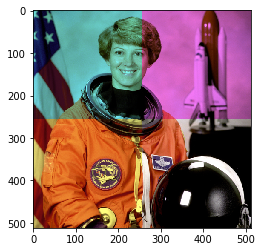

In [14]:
# Modify the first quadrant
first_quadrant[:, :, 0] = first_quadrant[:, :, 0] * 0.5
    
# Modify the second quadrant
second_quadrant[:, :, 1] = second_quadrant[:, :, 1] * 0.5
    
# Modify the third quadrant\n",
third_quadrant[:, :, 2] = third_quadrant[:, :, 2] * 0.5
    
# Modify the fourth quadrant
fourth_quadrant = fourth_quadrant * 0.5

# Print the image
plt.imshow(astronaut)

# Moral of the Story
"We have seen that working with color images in Python is not much more difficult that working with monochrome images; one simply has to keep track of the three color channels.\n",
    "\n",
    "As with monochrome images, one usually uses specialized libraries for image processing rather than modify them manually. However, it is good practice to do things by hand sometimes, and this has hopefully given you more hands-on experience with 3D arrays."